In [1]:
# %%
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

# %%
cifar_10 = tf.keras.datasets.cifar10
(train_images_former, train_labels_former), (test_images, test_labels) = cifar_10.load_data()

# %%
# Code here!

In [2]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

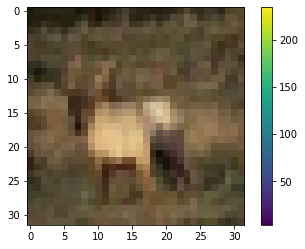

In [3]:
# %%
# 画张图看看
plt.figure()
plt.imshow(train_images_former[3])
plt.colorbar()
plt.grid(False)
plt.show()

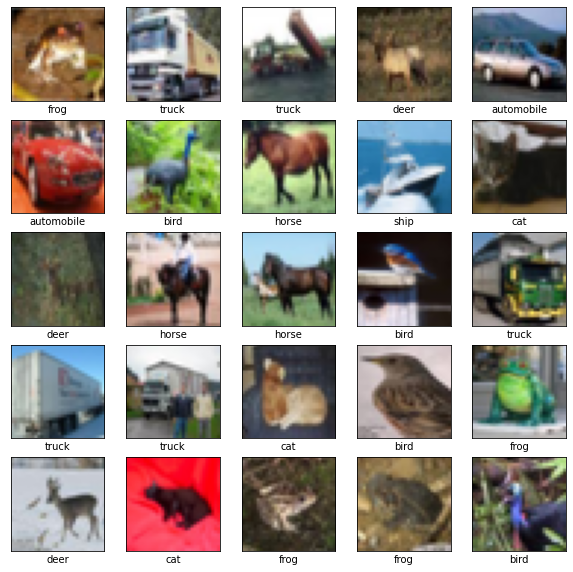

In [4]:
# %%
# 像素归一化，归一化后的像素范围为[0, 1]
train_images_former = train_images_former / 255.0

test_images = test_images / 255.0
# %%
# 肉眼可见图变灰了
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_former[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[int(train_labels_former[i])])
plt.show()


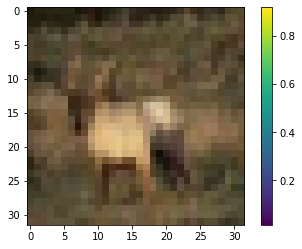

In [5]:
# %%
# 画张图看看
plt.figure()
plt.imshow(train_images_former[3])
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
# 分离train与valid
from sklearn.model_selection import train_test_split
train_images, valid_images, train_labels, valid_labels = train_test_split(train_images_former, train_labels_former, test_size=.2, random_state=1)

In [7]:
train_images.shape

(40000, 32, 32, 3)

In [8]:
len(train_labels)

40000

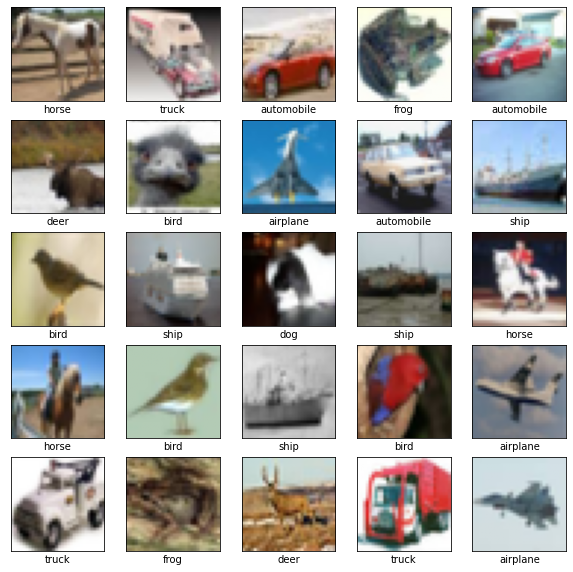

In [9]:
# 画图看看分离后的train
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[int(train_labels[i])])
plt.show()

In [10]:
# 以下能跑到test_acc=0.75,但是算太久了
# 神经网络搭建
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)), #效果上找出最明显特征
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10)
])

In [11]:
# 回调函数callbacks
from tensorflow.keras import layers, callbacks
early_stopping = callbacks.EarlyStopping(
    monitor='val_accuracy',
    min_delta=1e-5, # minimium amount of change to count as an improvement
    patience=15, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [12]:
# %%
# 编译模型
# 优化器选择adam
# 损失函数选用SparseCategoricalCrossentropy
cnn_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
# %%
# fit模型，开始训练
history =cnn_model.fit(train_images, train_labels,
                       validation_data=(valid_images, valid_labels), 
                       callbacks=[early_stopping], # callbacks
                       epochs=80, batch_size=32)


Epoch 1/80
1250/1250 [==============================] - 19s 15ms/step - loss: 1.7193 - accuracy: 0.3595 - val_loss: 1.4124 - val_accuracy: 0.4967
Epoch 2/80
1250/1250 [==============================] - 19s 15ms/step - loss: 1.3726 - accuracy: 0.5043 - val_loss: 1.2430 - val_accuracy: 0.5536
Epoch 3/80
1250/1250 [==============================] - 19s 15ms/step - loss: 1.2401 - accuracy: 0.5596 - val_loss: 1.1216 - val_accuracy: 0.6020
Epoch 4/80
1250/1250 [==============================] - 19s 15ms/step - loss: 1.1422 - accuracy: 0.5971 - val_loss: 1.0289 - val_accuracy: 0.6367
Epoch 5/80
1250/1250 [==============================] - 19s 15ms/step - loss: 1.0703 - accuracy: 0.6252 - val_loss: 1.1835 - val_accuracy: 0.5884
Epoch 6/80
1250/1250 [==============================] - 19s 15ms/step - loss: 1.0171 - accuracy: 0.6455 - val_loss: 0.9356 - val_accuracy: 0.6729
Epoch 7/80
1250/1250 [==============================] - 19s 15ms/step - loss: 0.9561 - accuracy: 0.6644 - val_loss: 0.9692 -

Epoch 57/80
1250/1250 [==============================] - 29s 24ms/step - loss: 0.4692 - accuracy: 0.8418 - val_loss: 0.8187 - val_accuracy: 0.7459
Epoch 58/80
1250/1250 [==============================] - 29s 23ms/step - loss: 0.4730 - accuracy: 0.8380 - val_loss: 0.8209 - val_accuracy: 0.7441
Epoch 59/80
1250/1250 [==============================] - 29s 23ms/step - loss: 0.4736 - accuracy: 0.8396 - val_loss: 0.8402 - val_accuracy: 0.7467
Epoch 60/80
1250/1250 [==============================] - 29s 23ms/step - loss: 0.4692 - accuracy: 0.8396 - val_loss: 0.8373 - val_accuracy: 0.7452
Epoch 61/80
1250/1250 [==============================] - 29s 24ms/step - loss: 0.4581 - accuracy: 0.8441 - val_loss: 0.8166 - val_accuracy: 0.7482
Epoch 62/80
1250/1250 [==============================] - 32s 26ms/step - loss: 0.4608 - accuracy: 0.8407 - val_loss: 0.8346 - val_accuracy: 0.7433
Epoch 63/80
1250/1250 [==============================] - 42s 34ms/step - loss: 0.4622 - accuracy: 0.8439 - val_loss: 0

In [14]:
# # 如果觉得上面跑太久了，就用下面代码，能跑到0.73
# # 神经网络搭建
# cnn_model = tf.keras.Sequential([
#     tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
#     tf.keras.layers.MaxPooling2D((2, 2)), #效果上找出最明显特征
#     tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
#     tf.keras.layers.MaxPooling2D((2, 2)),
#     tf.keras.layers.Dropout(0.25),
#     tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
#     tf.keras.layers.Dropout(0.25),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dropout(0.25),
#     tf.keras.layers.Dense(10)
# ])
# # 回调函数callbacks
# from tensorflow.keras import layers, callbacks
# early_stopping = callbacks.EarlyStopping(
#     monitor='val_accuracy',
#     min_delta=1e-5, # minimium amount of change to count as an improvement
#     patience=10, # how many epochs to wait before stopping
#     restore_best_weights=True,
# )
# # %%
# # 编译模型
# # 优化器选择adam
# # 损失函数选用SparseCategoricalCrossentropy
# cnn_model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])
# # %%
# # fit模型，开始训练
# history =cnn_model.fit(train_images, train_labels,
#                        validation_data=(valid_images, valid_labels), 
#                        callbacks=[early_stopping], # callbacks
#                        epochs=20, batch_size=32)

Minimum validation loss: 0.7757076025009155


<AxesSubplot:>

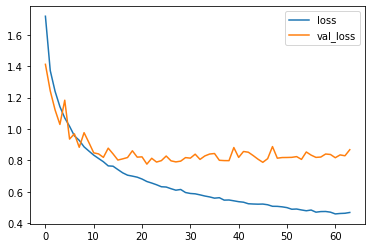

In [15]:
import pandas as pd
history_df = pd.DataFrame(history.history)
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))
history_df.loc[:, ['loss', 'val_loss']].plot()
# %%

In [16]:
# %%
# 测试模型
test_loss, test_acc = cnn_model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)
# %%
# 这里直接接一个softmax把输出转化成概率
probability_model = tf.keras.Sequential([cnn_model, 
                                         tf.keras.layers.Softmax()])
# %%
predictions = probability_model.predict(test_images)
# %%
predictions[0]
# %%
# argmax把输出最大概率的元素，得到结果
np.argmax(predictions[0])
# %%
test_labels[0]
# %%

313/313 - 3s - loss: 0.8131 - accuracy: 0.7553 - 3s/epoch - 11ms/step

Test accuracy: 0.755299985408783
313/313 [==============================] - 5s 13ms/step


array([3], dtype=uint8)

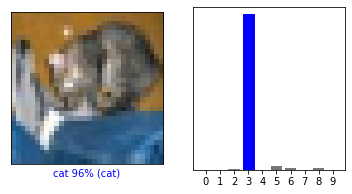

In [17]:
# %%
# 可视化
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[int(true_label)]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[int(true_label)].set_color('blue')
# %%
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


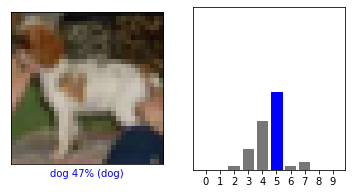

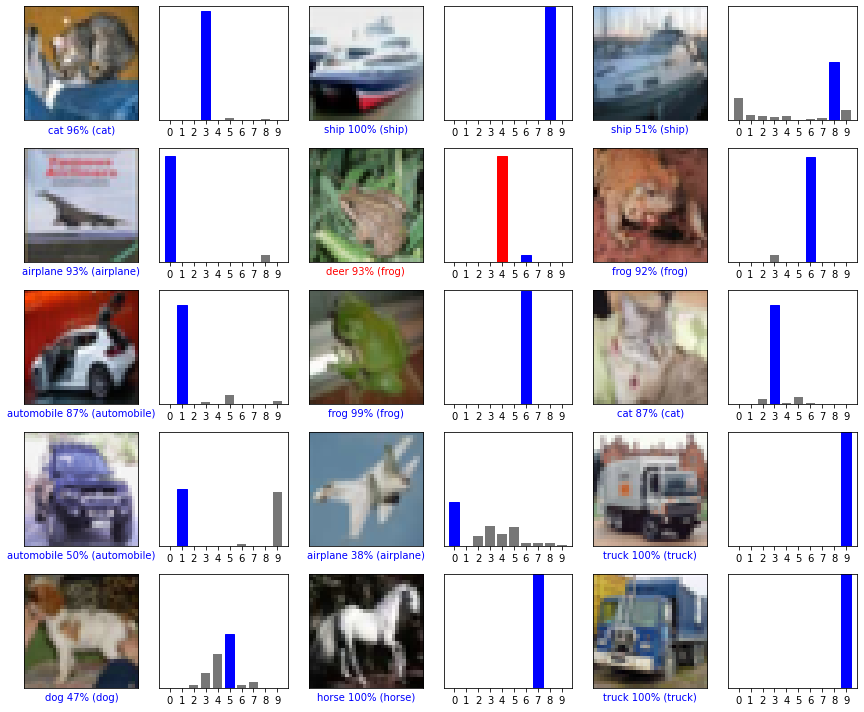

In [18]:
# %%
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()
# %%
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()
# %%
